In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [3]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [4]:
def plot_3d(x, y, p, label='$z$', elev=30.0, azim=45.0):
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, p, cmap=cm.viridis)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev = elev, azim = azim)

In [5]:
def laplace_solution(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x, y)
    p = (numpy.sinh(1.5 * numpy.pi * Y / Ly) /
         numpy.sinh(1.5 * numpy.pi * Ly / Lx) *
         numpy.sin(1.5 * numpy.pi * X / Lx))
    return p

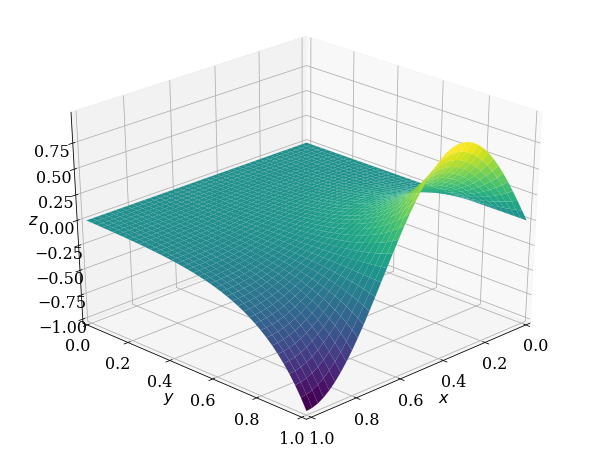

In [6]:
Lx = 1.0
Ly = 1.0
nx = 41
ny = 41

x = numpy.linspace(0.0, Lx, num = nx)
y = numpy.linspace(0.0, Ly, num = ny)

p_exact = laplace_solution(x, y, Lx, Ly)

plot_3d(x, y, p_exact)

In [7]:
def l2_norm(p, p_ref):
    l2_diff = (numpy.sqrt(numpy.sum((p - p_ref)**2)) / 
               numpy.sqrt(numpy.sum(p_ref**2)))
    return l2_diff

In [12]:
def laplace_2d_jacobi(p0, maxiter = 20000, rtol = 1e-6):
    p = p0.copy()
    diff = rtol + 1.0
    ite = 0
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = 0.25 * (p[1:-1, :-2] + p[1:-1, 2:] + 
                                p[:-2, 1:-1] + p[2:, 1:-1])
        
        p[1:-1, -1] = p[1:-1, -2]
        diff = l2_norm(p, pn)
        ite += 1
    return p, ite, diff

In [13]:
p0 = numpy.zeros((ny, nx))
p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)

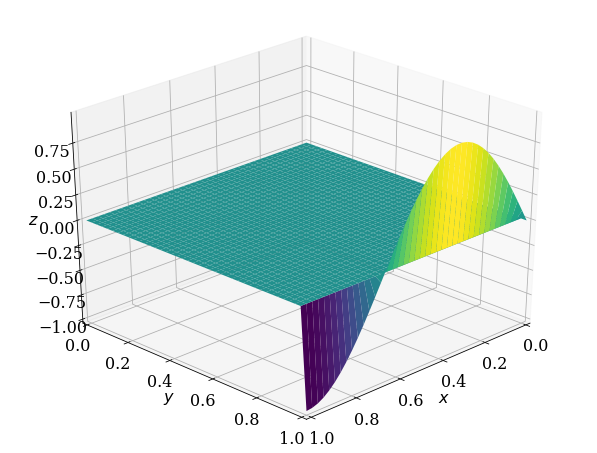

In [14]:
plot_3d(x, y, p0)

In [15]:
p, ites, diff = laplace_2d_jacobi(p0, rtol = 1e-8)
print('Jacobi Relaxation: {} iterations '.format(ites) + 
      'to reach a relative difference of {}'.format(diff))

Jacobi Relaxation: 4473 iterations to reach a relative difference of 9.989253685041417e-09


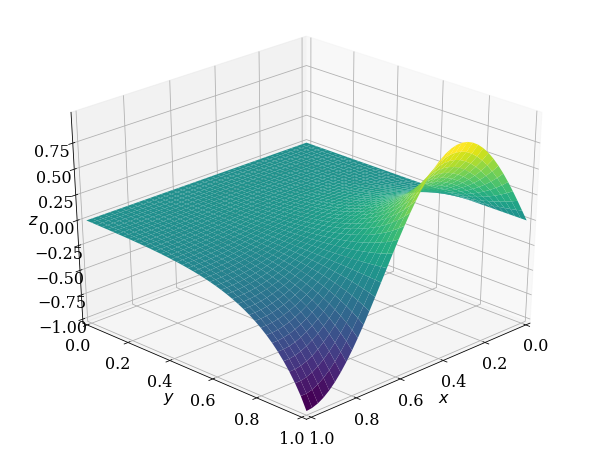

In [17]:
plot_3d(x, y, p)

In [18]:
nx_values = [11, 21, 41, 81]

errors = []
for nx in nx_values:
    ny = nx
    
    x = numpy.linspace(0.0, Lx, num = nx)
    y = numpy.linspace(0.0, Ly, num = ny)
    p0 = numpy.zeros((nx, ny))
    p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)
    
    p, _, _ = laplace_2d_jacobi(p0, rtol = 1e-8)
    p_exact = laplace_solution(x, y, Lx, Ly)
    errors.append(l2_norm(p, p_exact))

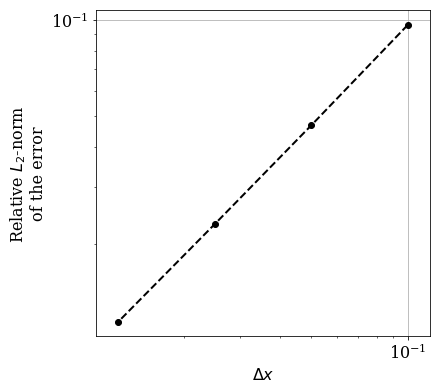

In [19]:
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');

In [21]:
def laplace_2d_jacobi_neumann(p0, maxiter = 20000, rtol=1e-6):
    p = p0.copy()
    diff = rtol + 1.0
    ite = 0 
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = 0.25 * (p[1:-1, :-2] + p[1:-1, 2:] +
                                p[:-2, 1:-1] + p[2:, 1:-1])
        
        p[1:-1, -1] = 0.25 * (2.0 * pn[1:-1, -2] +
                              pn[2:, -1] + pn[:-2, -1])
        
        diff = l2_norm(p, pn)
        ite += 1
    return p, ite, diff

In [22]:
nx_values = [11, 21, 41, 81]

errors = []

for nx in nx_values:
    ny = nx
    x = numpy.linspace(0.0, Lx, num = nx)
    y = numpy.linspace(0.0, Ly, num = ny)
    p0 = numpy.zeros((nx, ny))
    p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)
    
    p, _, _ = laplace_2d_jacobi_neumann(p0, rtol = 1e-8)
    p_exact = laplace_solution(x, y, Lx, Ly)
    errors.append(l2_norm(p, p_exact))

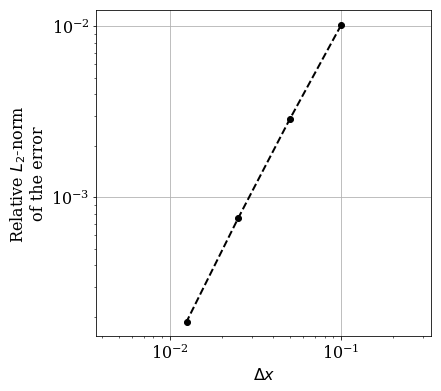

In [23]:
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');